In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


In [2]:
Net_data_vnew=pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
Net_data_vnew.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
Net_data_test=pd.read_csv("Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
Net_data_test.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [4]:
Net_data=pd.concat([Net_data_vnew,Net_data_test],ignore_index='True')

In [5]:
Net_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                148517 non-null  int64  
 1   protocoltype            148517 non-null  object 
 2   service                 148517 non-null  object 
 3   flag                    148517 non-null  object 
 4   srcbytes                148517 non-null  int64  
 5   dstbytes                148517 non-null  int64  
 6   land                    148517 non-null  int64  
 7   wrongfragment           148517 non-null  int64  
 8   urgent                  148517 non-null  int64  
 9   hot                     148517 non-null  int64  
 10  numfailedlogins         148517 non-null  int64  
 11  loggedin                148517 non-null  int64  
 12  numcompromised          148517 non-null  int64  
 13  rootshell               148517 non-null  int64  
 14  suattempted         

In [6]:
Net_data.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
Net_data.describe(include='O')

,protocoltype,service,flag,attack
count,148517,148517,148517,148517
unique,3,70,11,40
top,tcp,http,SF,normal
freq,121569,48191,89820,77054


In [8]:
Net_data.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [9]:
Net_data_new=Net_data[['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
    'wrongfragment','hot', 'loggedin',
    'numcompromised', 'rootshell', 'suattempted', 'numroot',
    'numfilecreations', 'numshells', 'numaccessfiles',
    'isguestlogin', 'count', 'srvcount', 'serrorrate',
    'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
    'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
    'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
    'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
    'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag']].copy()

In [10]:
Net_data_new.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate         0
dsthostsrvrerrorrate

In [11]:
Net_data_new.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
148512    False
148513    False
148514    False
148515     True
148516    False
Length: 148517, dtype: bool

In [12]:
Net_data.loc[Net_data.duplicated()]

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
126081,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
126139,0,tcp,private,S0,0,0,0,0,0,0,...,0.03,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune,21
126154,0,udp,domain_u,SF,44,44,0,0,0,0,...,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,normal,18
126208,0,icmp,ecr_i,SF,1480,0,0,1,0,0,...,1.00,0.00,1.00,0.51,0.0,0.0,0.0,0.0,pod,15
126214,0,udp,domain_u,SF,44,44,0,0,0,0,...,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,normal,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148440,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune,21
148458,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf,20
148501,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf,19
148511,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf,20


In [13]:
Obj_col=Net_data_new.select_dtypes(include='object').columns
print(Obj_col)

Index(['protocoltype', 'service', 'flag', 'attack'], dtype='object')


In [14]:
Net_data_new_M=Net_data_new.copy()

In [15]:
Net_data_new_M['attack'].loc[Net_data_new_M['attack']!='normal']='attack'

C:\Users\Win_10\AppData\Local\Temp\ipykernel_3308\2839047030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Net_data_new_M['attack'].loc[Net_data_new_M['attack']!='normal']='attack'


In [16]:
le=LabelEncoder()
for i in Obj_col:
    Net_data_new_M[i]=le.fit_transform(Net_data_new_M[i])

In [17]:
Net_data_new_M.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                148517 non-null  int64  
 1   protocoltype            148517 non-null  int32  
 2   service                 148517 non-null  int32  
 3   flag                    148517 non-null  int32  
 4   srcbytes                148517 non-null  int64  
 5   dstbytes                148517 non-null  int64  
 6   wrongfragment           148517 non-null  int64  
 7   hot                     148517 non-null  int64  
 8   loggedin                148517 non-null  int64  
 9   numcompromised          148517 non-null  int64  
 10  rootshell               148517 non-null  int64  
 11  suattempted             148517 non-null  int64  
 12  numroot                 148517 non-null  int64  
 13  numfilecreations        148517 non-null  int64  
 14  numshells           

<Axes: >

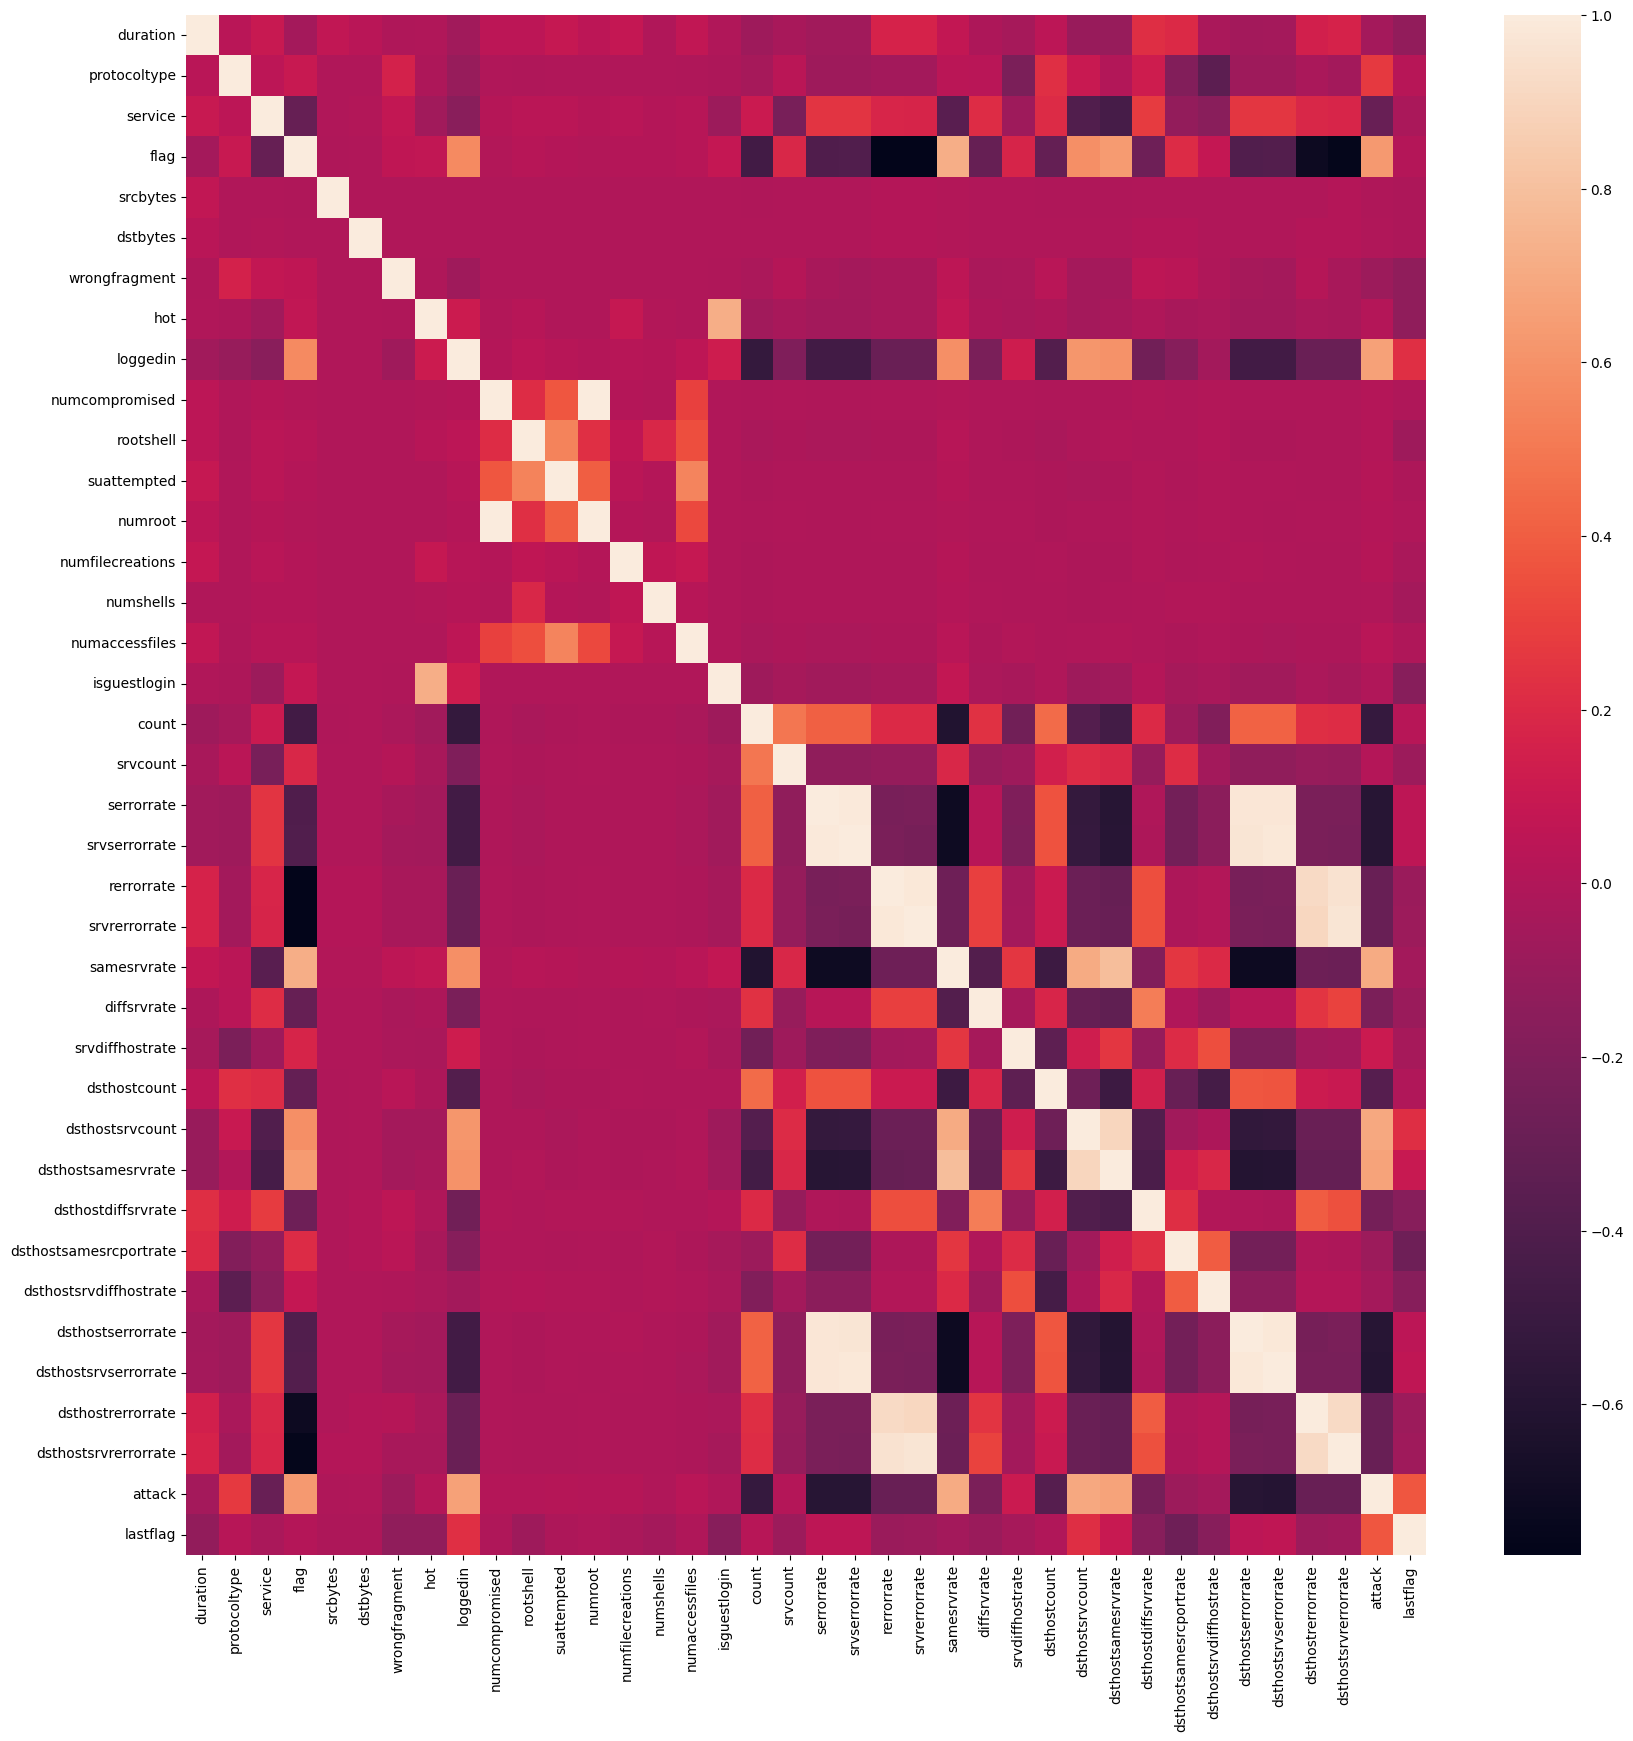

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(Net_data_new_M.corr(),annot=False)


In [19]:

#column = Net_data_new_M.columns.tolist()
#print (column)

#nya variable dwefine hoga column
column = Net_data_new_M.columns.tolist()
col_r = set()
corr = Net_data_new_M.corr()
for i in range(len(column)-1):
    for j in range(i+1,len(column)):
        if corr[column[i]][column[j]]>0.9:
            print(column[i],column[j],corr[column[i]][column[j]])
            col_r.add(column[i])

numcompromised numroot 0.9987247769091526
serrorrate srvserrorrate 0.9915070693808372
serrorrate dsthostserrorrate 0.9746962586935748
serrorrate dsthostsrvserrorrate 0.9760304550908055
srvserrorrate dsthostserrorrate 0.9708019602537421
srvserrorrate dsthostsrvserrorrate 0.9819824454731348
rerrorrate srvrerrorrate 0.9860951463945854
rerrorrate dsthostrerrorrate 0.9168894291969533
rerrorrate dsthostsrvrerrorrate 0.9573580783780464
srvrerrorrate dsthostrerrorrate 0.9063357988123594
srvrerrorrate dsthostsrvrerrorrate 0.9656063394958903
dsthostserrorrate dsthostsrvserrorrate 0.9828121495094096
dsthostrerrorrate dsthostsrvrerrorrate 0.9213497772478179


In [20]:
col_r = list(col_r)
print (col_r)

['dsthostrerrorrate', 'srvserrorrate', 'srvrerrorrate', 'dsthostserrorrate', 'rerrorrate', 'numcompromised', 'serrorrate']


In [21]:
Net_data_new_D = Net_data_new_M.drop(col_r,axis = 1)
Net_data_new_D.columns
print (Net_data_new_D.shape)
Net_data_new.shape

(148517, 31)


(148517, 38)

In [22]:
x = Net_data_new_D.drop(['attack'],axis=1)
y  =Net_data_new_D['attack']

In [23]:
sc = StandardScaler()
x_transform = sc.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size=0.3,random_state=42)

In [25]:
print (x_train.shape)
x_test.shape

(103961, 30)


(44556, 30)

In [26]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)


In [27]:
print(acc_score)

0.9651449860849268


In [28]:
pre_score = precision_score(y_test,y_pred)
pre_score

0.9690887718228918

In [29]:
re_score = recall_score(y_test,y_pred)
re_score

0.9635096528439097

In [30]:
f_score = f1_score(y_test,y_pred)
f_score

0.966291159297606

In [31]:
"""l = [1,2,3,4,5]
for i in range(1,len(l)+1):
    i_index = i % len(l) 
    print (l[i]) """

'l = [1,2,3,4,5]\nfor i in range(1,len(l)+1):\n    i_index = i % len(l) \n    print (l[i]) '